In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp2d

17
[-100.   -87.5  -75.   -62.5  -50.   -37.5  -25.   -12.5    0.    12.5
   25.    37.5   50.    62.5   75.    87.5  100. ]


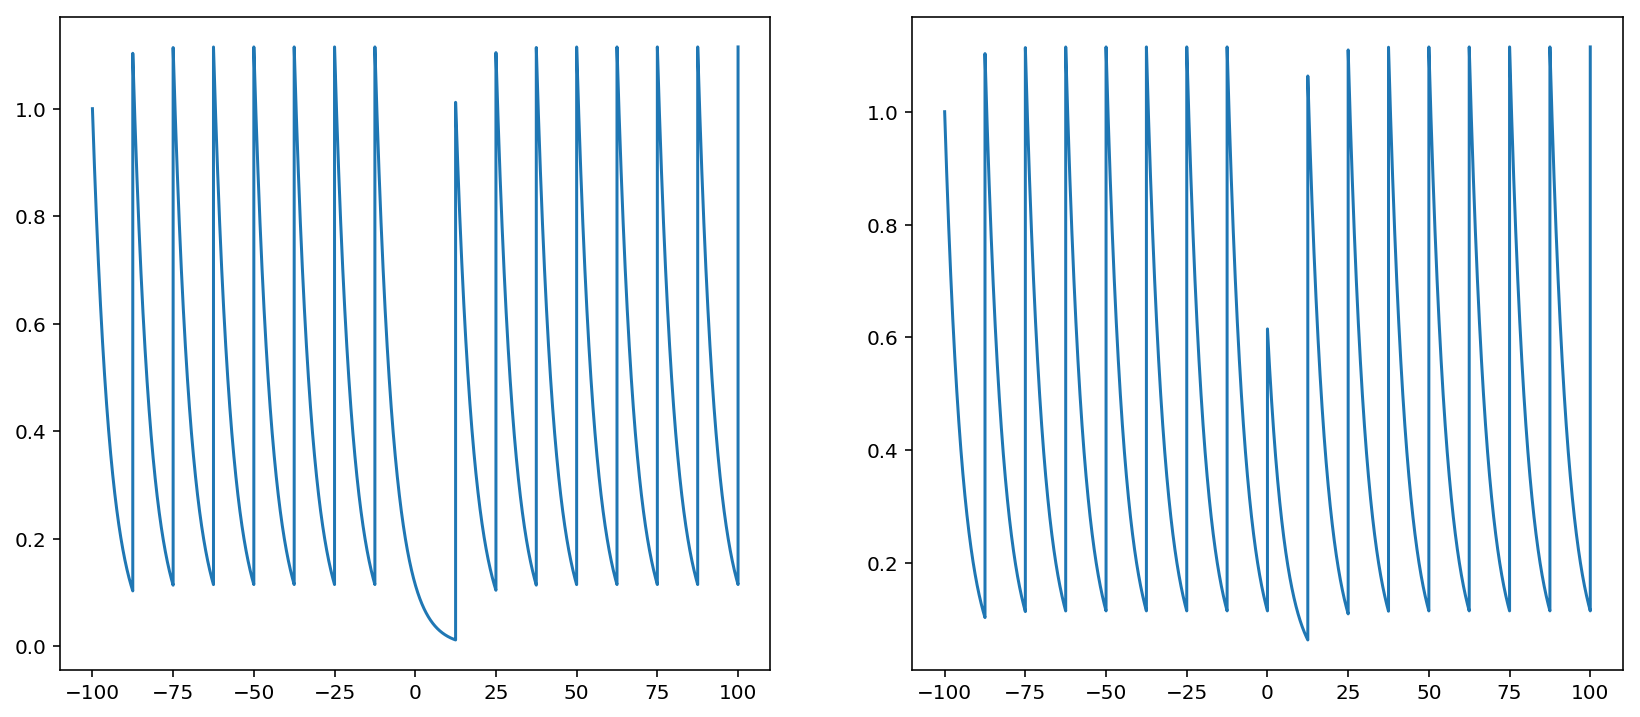

In [69]:
delayRange = 100
numPulses = int(2*np.floor(delayRange/12.5)+1)
print(numPulses)
pulseInRange = np.floor(delayRange/12.5)*12.5
pulses = np.linspace(-pulseInRange,pulseInRange,numPulses)
print(pulses)

numt = 2*delayRange*1000+1 # number of time elements (resolution 100fs if *10000)
tlist = np.linspace (-delayRange, delayRange, numt) #array of time (in ns)
numTau = 2*delayRange*1000+1 # number of delay elements
taulist = np.linspace (-delayRange, delayRange, numTau) #array of delays (in ns)

#make photon flux pulsetrain - each peak is an exponential decay with lifetime gamma
lifetime = 5.5 # lifetime in ns

#initialise pulsetrain
pulsetrain_1phot = np.zeros(numt)
pulsetrain_2phot = np.zeros(numt)

# fill pulsetrain
for i in range(numPulses):
    if pulses[i] == 0:
        thisPulse = np.exp(-(tlist-pulses[i])/lifetime)
        thisPulse[thisPulse>1] = 0
        thisPulse = thisPulse*0.5
        pulsetrain_2phot = pulsetrain_2phot + thisPulse
    else:
        thisPulse = np.exp(-(tlist-pulses[i])/lifetime)
        thisPulse[thisPulse>1] = 0
        pulsetrain_1phot = pulsetrain_1phot+thisPulse
        pulsetrain_2phot = pulsetrain_2phot+thisPulse

singlepulse = np.exp(-(tlist)/lifetime)
singlepulse[singlepulse>1] = 0
    
fig0 = plt.figure(figsize=(14,6))
ax01 = fig0.add_subplot(121)
ax01.plot(tlist,pulsetrain_1phot)
ax02 = fig0.add_subplot(122)
ax02.plot(tlist,pulsetrain_2phot)


In [70]:
#calculate correlations
autoCorr_1phot = np.correlate(pulsetrain_1phot,singlepulse,"same")
autoCorr_2phot = np.correlate(pulsetrain_2phot,singlepulse,"same")
singleautocorr = np.correlate(singlepulse,singlepulse,"same")

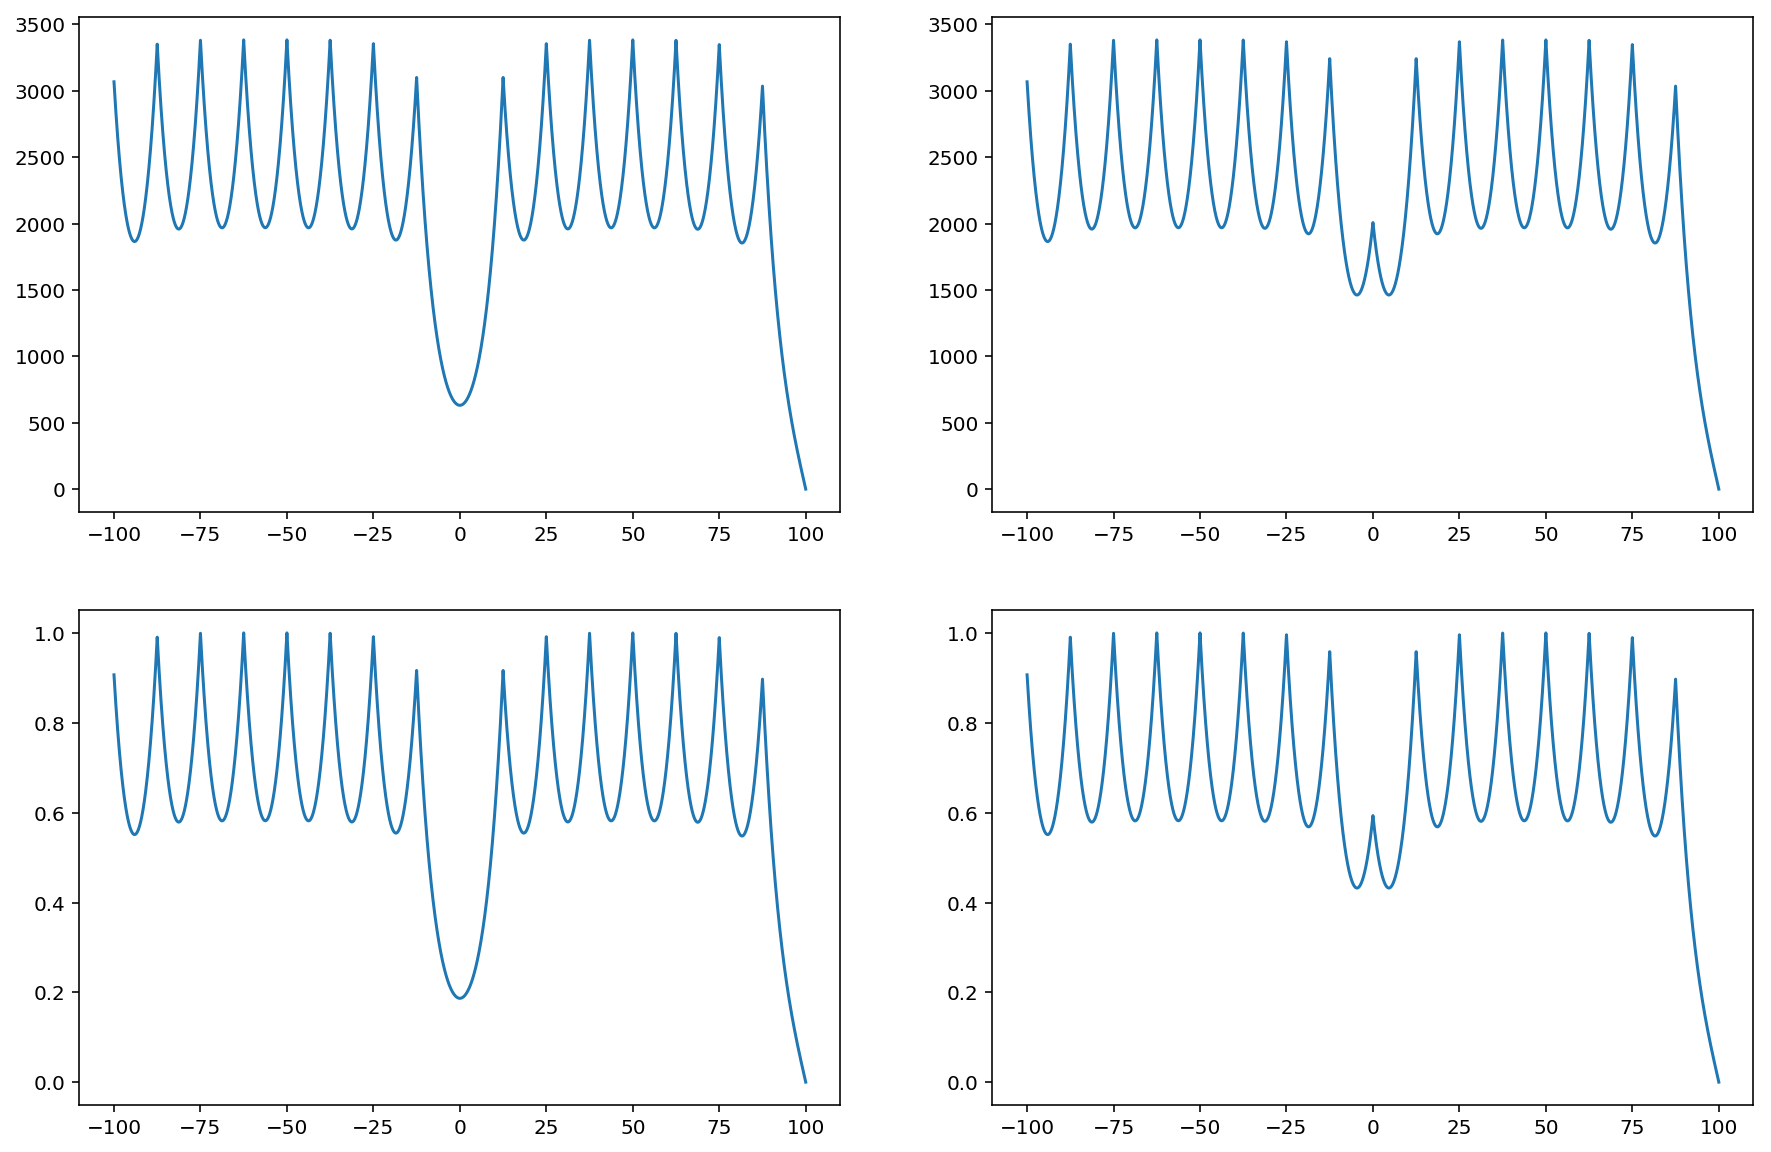

In [71]:
fig1 = plt.figure(figsize=(15,10))
ax11 = fig1.add_subplot(221)
ax11.plot(taulist,autoCorr_1phot)
ax12 = fig1.add_subplot(222)
ax12.plot(taulist,autoCorr_2phot)
g2_1phot = autoCorr_1phot/np.max(autoCorr_1phot)
g2_2phot = autoCorr_2phot/np.max(autoCorr_2phot)
ax13 = fig1.add_subplot(223)
ax13.plot(taulist,g2_1phot)
ax14 = fig1.add_subplot(224)
ax14.plot(taulist,g2_2phot)

(0.01, 1)

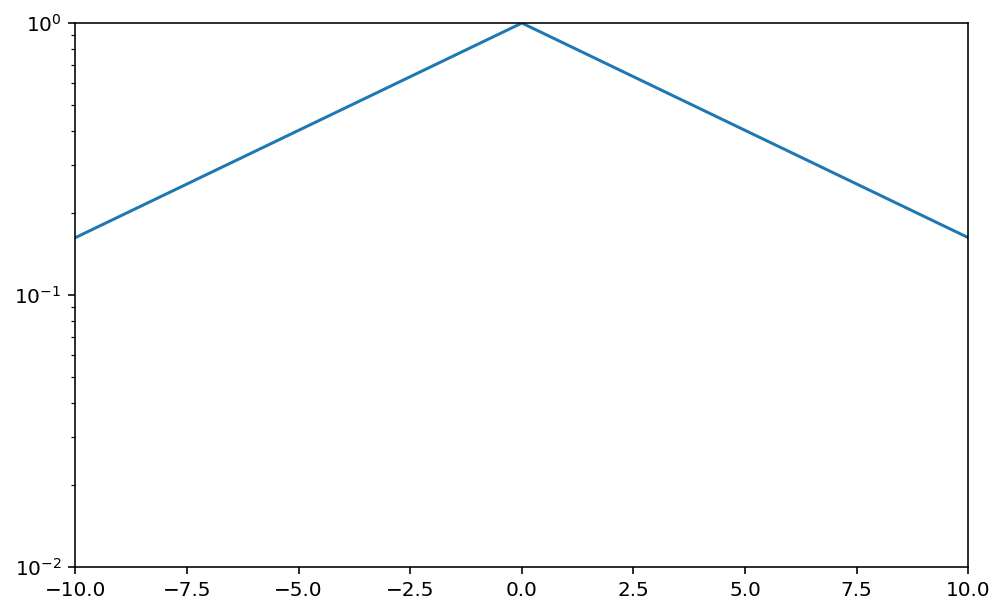

In [72]:
singleautocorr = singleautocorr/np.max(singleautocorr)
fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.semilogy(taulist, singleautocorr)
ax2.set_xlim(-10, 10)
ax2.set_ylim(0.01, 1)

[ 0.53692126  0.54163269  0.54670653  0.55096494  0.56102202  0.57298179
  0.60786446  0.63930416  0.68370028  0.72746217  0.84135182  0.88756003
  1.          0.90269095  0.81734167  0.73833469  0.68813989  0.63975718
  0.60550874  0.58140799  0.55893812  0.55966295  0.53474676  0.54416961
  0.53692126]
1.07728549425


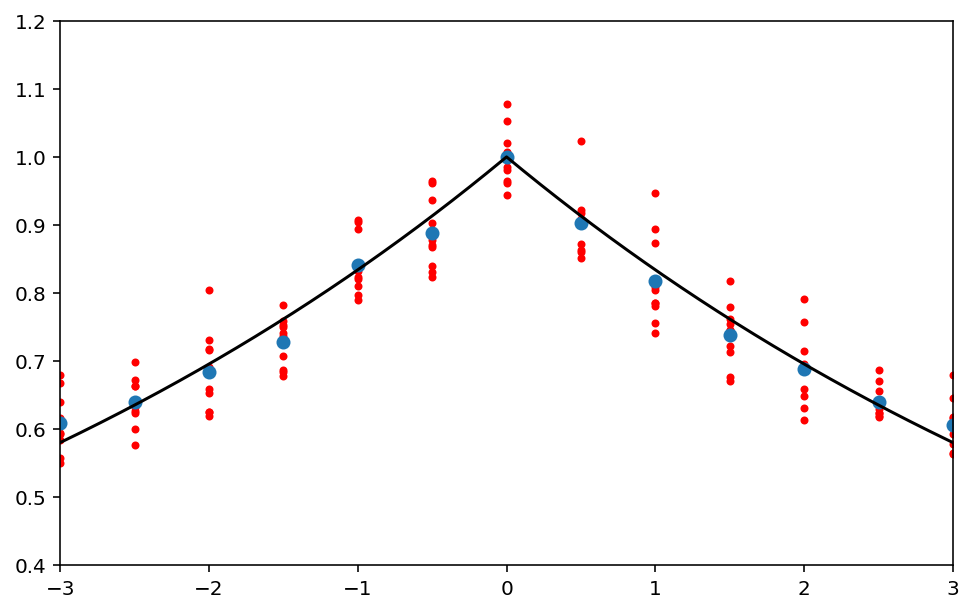

In [76]:
#import experimental data
decay1000 = np.genfromtxt ('decay1000_fullPeak.csv', delimiter=",")
decay_taulist = np.linspace(-6,6,25)
decayStats = np.genfromtxt ('decayStats_fullPeak.csv', delimiter=",")

decay1000 = decay1000/np.max(decayStats[2,:])
decayStats[2,:] = decayStats[2,:]/np.max(decayStats[2,:])

print(decayStats[2,:])

fig3, ax3 = plt.subplots(figsize=(8,5))
for ii in range(decay1000[:,0].size):
    ax3.plot(decay_taulist,decay1000[ii,:],'.r')

ax3.plot(decay_taulist,decayStats[2,:],'o')

ax3.plot(taulist, singleautocorr,'k')
ax3.set_xlim(-3,3)
ax3.set_ylim(0.4,1.2)

print(np.max(decay1000))

[[ 0.98577512  1.00570807  0.96221799  1.05282232  1.07728549  1.00661412
   0.9812449   1.02020477  0.96403008  0.94409713]
 [ 0.90151309  0.86255323  0.87161366  0.91691583  1.0229229   0.86074114
   0.85168071  0.90876144  0.90876144  0.92144605]
 [ 0.74114343  0.78010329  0.80909667  0.75564012  0.94681526  0.78463351
   0.80366041  0.8933587   0.87342575  0.78553955]
 [ 0.67590831  0.67047205  0.72211652  0.77919725  0.81725106  0.7447676
   0.71305608  0.75473408  0.7447676   0.76107638]
 [ 0.61339132  0.64872701  0.69584126  0.63060614  0.79097581  0.68859291
   0.75654616  0.71396213  0.68496874  0.65778744]
 [ 0.63785449  0.62245175  0.63423032  0.67047205  0.68678083  0.61882758
   0.6297001   0.61792154  0.6233578   0.65597536]]
[[-0.1956538  -0.19457165 -0.16420288 -0.19134528 -0.18111636 -0.18023885
  -0.15387733 -0.19424952 -0.18214219 -0.16362019]
 [-0.04671008 -0.03963564 -0.04996402  0.00154938  0.09813217 -0.0303055
  -0.05394564  0.028121   -0.00787849 -0.04451623]]


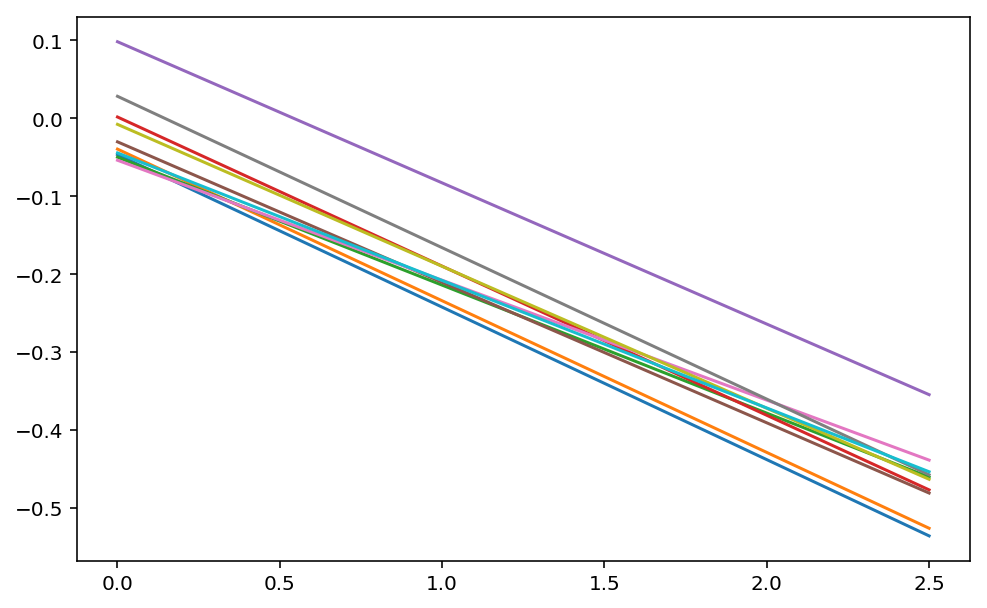

In [74]:
import matplotlib.pyplot as plt
#linear fit
fig4, ax4 = plt.subplots(figsize=(8,5))
#ax4.plot(decay_taulist,decayStats[2,:]/np.max(decayStats[2,:]),'o')

posDecays1000 = decay1000.T[12:18,:]
print(posDecays1000)

posDecay_taulist = decay_taulist[12:18]
xp = np.linspace(posDecay_taulist[0],posDecay_taulist[-1],100)


fit1000 = np.polyfit(posDecay_taulist, np.log(posDecays1000), 1)
print(fit1000)

for q in range(fit1000[0,:].size):
    ax4.plot(xp,fit1000[0,q]*xp + fit1000[1,q])
    
print(1/np.mean(fit1000[0,:]))